In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools




def Sigmoid(Z):
        return 1/(1+np.exp(-Z))
    
def Relu(Z):
    return np.maximum(0,Z)


def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x
def dSigmoid(Z):
    s = 1/(1+np.exp(-Z))
    dZ = s * (1-s)
    return dZ

class dlnet:
    def __init__(self, x, y):
        self.X=x
        self.Y=y
        self.Yh=np.zeros((1,self.Y.shape[1]))
        self.L=2
        self.dims = [9, 15, 1]
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr=0.003
        self.sam = self.Y.shape[1]
        self.threshold=0.5
    def nInit(self):    
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0]) 
        self.param['b1'] = np.zeros((self.dims[1], 1))        
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1]) 
        self.param['b2'] = np.zeros((self.dims[2], 1))                
        return
    
    def nloss(self,Yh):
        loss = (1./self.sam) * (-np.dot(self.Y,np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))    
        return loss
    
    def forward(self):
        Z1 = self.param['W1'].dot(self.X)+self.param['b1']
        A1 = Relu(Z1)
        self.ch['Z1'],self.ch['A1']=Z1,A1
        
        Z2 = self.param['W2'].dot(A1)+self.param['b2']
        A2 = Sigmoid(Z2)
        self.ch['Z2'],self.ch['A2']=Z2,A2
        
        self.Yh=A2
        loss=self.nloss(A2)
        return self.Yh, loss
        
    
    


    def backward(self):
            dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))    

            dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])    
            dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
            dLoss_W2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2,self.ch['A1'].T)
            dLoss_b2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1])) 

            dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1'])        
            dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
            dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
            dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))  

            self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
            self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
            self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
            self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2

    def gd(self,X, Y, iter = 3000):
            np.random.seed(1)                         

            self.nInit()
    
            for i in range(0, iter):
                Yh, loss=self.forward()
                self.backward()

                if i % 500 == 0:
                    print ("Cost after iteration %i: %f" %(i, loss))
                    self.loss.append(loss)
            
            plt.plot(np.squeeze(self.loss))
            plt.ylabel('Loss')
            plt.xlabel('Iter')
            plt.title("Lr =" + str(self.lr))
            plt.show()

            return
    def pred(self,x, y):  
        self.X=x
        self.Y=y
        comp = np.zeros((1,x.shape[1]))
        pred, loss= self.forward()    
    
        for i in range(0, pred.shape[1]):
            if pred[0,i] > self.threshold: 
                comp[0,i] = 1
            #else: 
             #   comp[0,i] = 0
    
        print("Acc: " + str(np.sum((comp == y)/x.shape[1])))
        
        return comp




In [108]:
df = pd.read_csv('breast-cancer-wisconsin.data', header= None)
df = df[~df[6].isin(['?'])]
df.iloc[:,10].replace({2,4},{0,1},inplace=True)
df.astype(float)
df.head(5)


names = df.columns[0:10]
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df.iloc[:,0:10]) 
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df[10]= df[10]
scaled_df.head(5)

x=scaled_df.iloc[0:500,1:10].values.transpose()
y=df.iloc[0:500,10:].values.transpose()
xval=scaled_df.iloc[501:683,1:10].values.transpose()
yval=df.iloc[501:683,10:].values.transpose()

Cost after iteration 0: 0.673967
Cost after iteration 500: 0.388928
Cost after iteration 1000: 0.231340
Cost after iteration 1500: 0.171447
Cost after iteration 2000: 0.146433
Cost after iteration 2500: 0.133993
Cost after iteration 3000: 0.126808
Cost after iteration 3500: 0.122107
Cost after iteration 4000: 0.118650
Cost after iteration 4500: 0.116027
Cost after iteration 5000: 0.113934
Cost after iteration 5500: 0.112221
Cost after iteration 6000: 0.110783
Cost after iteration 6500: 0.109546
Cost after iteration 7000: 0.108474
Cost after iteration 7500: 0.107537
Cost after iteration 8000: 0.106710
Cost after iteration 8500: 0.105977
Cost after iteration 9000: 0.105317
Cost after iteration 9500: 0.104718
Cost after iteration 10000: 0.104174
Cost after iteration 10500: 0.103674
Cost after iteration 11000: 0.103216
Cost after iteration 11500: 0.102785
Cost after iteration 12000: 0.102377
Cost after iteration 12500: 0.101980
Cost after iteration 13000: 0.101604
Cost after iteration 1350

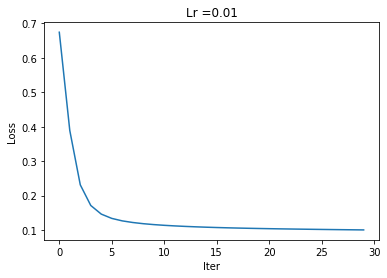

In [109]:
nn = dlnet(x,y)
nn.lr=0.01
nn.dims = [9, 15, 1]
nn.gd(x, y, iter = 15000)

In [110]:
nn.pred(xval,yval)

Acc: 1.0


array([[0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 1., 1.]])

In [111]:
nn.pred(x,y)

Acc: 0.9620000000000003


array([[0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
        0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
        1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 

In [112]:
def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(tick_marks,class_labels)
    plt.yticks(tick_marks,class_labels)
    thresh = cf.max() / 2.
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
    plt.show();

Acc: 0.9500000000000003


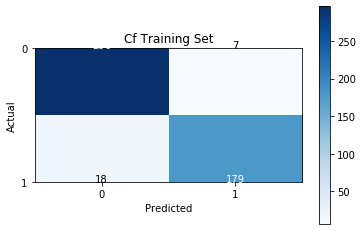

In [113]:
nn. threshold = 0.7
nn.X,nn.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.pred(x,y)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Training Set')



Acc: 0.989010989010989


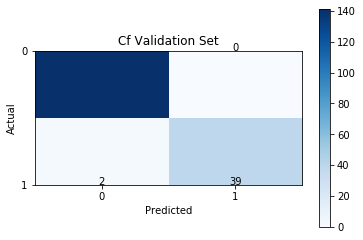

In [117]:
nn.threshold=0.9
nn.X,nn.Y=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.pred(xval,yval)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Validation Set')